In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os
import scipy
from scipy.optimize import curve_fit
from scipy.special import wofz
from scipy import optimize

slope: 0.00031494280543425024 +- 9.094135548403855e-05
offset: 0.015347763837390033 +- 0.02066811155225024


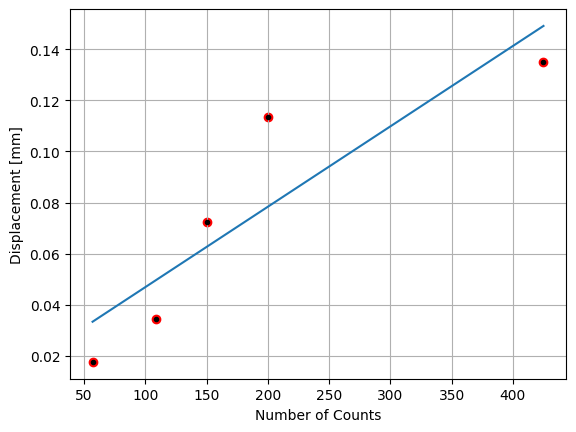

In [3]:
fig, ax = plt.subplots()

#ydata = [0.0130, 0.0348, 0.0642, 0.0869, 0.1103, 0.1404]   # HeNe laser
#xdata = [74, 108, 197, 262,  338, 430]               # HeNe laser
#yerr = [0.00005, 0.00005, 0.00005, 0.00005, 0.00005, 0.00005]

#ydata = [0.0176, 0.0344, 0.0723, 0.1136, 0.049, 0.1352]          # Diode Laser
#xdata = [57, 109, 150, 200, 310, 425]                            # Diode Laser
#yerr = [0.00005, 0.00005, 0.00005, 0.00005, 0.00005, 0.00005]

ydata = [0.0176, 0.0344, 0.0723,  0.1136, 0.1352]          # Diode Laser
xdata = [57, 109, 150, 200, 425]                      # Diode Laser
yerr = [0.00005, 0.00005, 0.00005, 0.00005, 0.00005]               # diode Laser, bit with outliers removed

xdata, ydata, yerr = np.array(xdata), np.array(ydata), np.array(yerr)

def func(x,m,b):
    return m*x+b

initialguess = [100,50]

fit, covariance = optimize.curve_fit(
        func,
        xdata,
        ydata,                                    # data for dependant variable
        initialguess,                             # initial guess of fit parameters
        yerr)                                     # uncertainty in dependant variable.

print("slope:",fit[0],"+-",np.sqrt(covariance[0][0]))
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1]))

plt.scatter(xdata, ydata, color='red', marker='o', alpha=1)
xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function

plt.plot(xdatafit, func_plot)
plt.errorbar(xdata, ydata, yerr, fmt='k.')

plt.xlabel('Number of Counts')
plt.ylabel('Displacement [mm]')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

#plt.savefig('fit_diode.pdf',dpi=100,bbox_inches='tight')
plt.show()

In [5]:
hene = [351, 644, 652, 663, 653, 653]
diode = [618, 631, 964, 1136, 636]

print(np.mean(hene), np.std(hene))
print(np.mean(diode), np.std(diode))

602.6666666666666 112.68343070547486
797.0 213.69510991129394


slope: 286.5088752087473 +- 11.340022562777312
offset: 20.142682665406404 +- 9.81327473797017


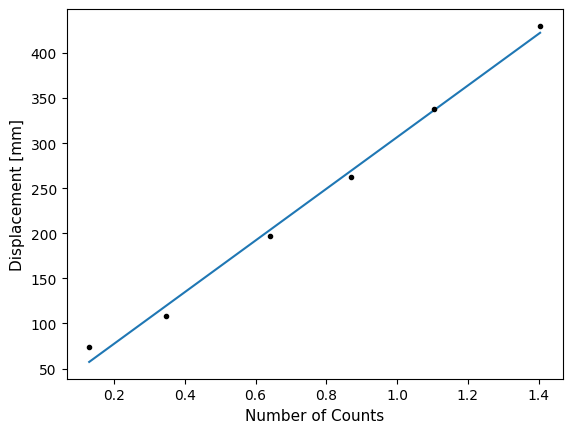

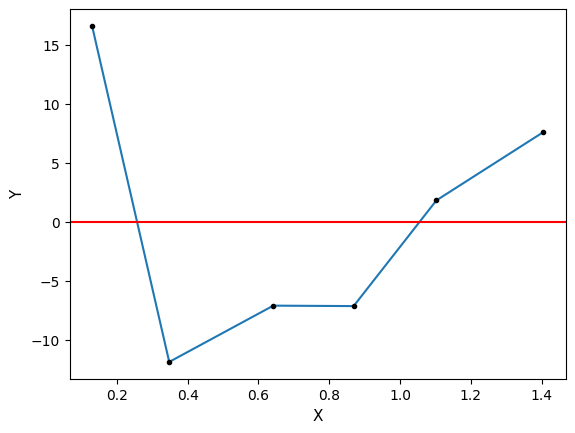

In [24]:
def func(x,m,b):
    return m*x+b

initialguess = [1,1]

fit, covariance = optimize.curve_fit(
        func,
        xdata,
        ydata,                                    # data for dependant variable
        initialguess,                             # initial guess of fit parameters
        yerr)                                     # uncertainty in dependant variable.  Remove if you already removed yerr

print("slope:",fit[0],"+-",np.sqrt(covariance[0][0]))
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1]))

##########
# Plotting data and fit
##########

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function

plt.clf()
plt.plot(xdatafit, func_plot)
plt.errorbar(xdata, ydata, yerr, fmt='k.')
plt.xlabel('Number of Counts',fontsize = 11)
plt.ylabel('Displacement [mm]',fontsize = 11)
plt.show()

##########
# Plotting residuals
##########

func_model=func(xdata,*fit)
residual = (ydata-func_model)
normresidual = (ydata-func_model)/yerr

plt.clf()
plt.errorbar(xdata, residual, fmt='k.')
plt.plot(xdata, residual)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel('X',fontsize = 11)
plt.ylabel('Y',fontsize = 11)
plt.show()

In [14]:
nm_to_mm = 1e-6

unc_L = 0.05
unc_T = 0.005
unc_wave = 20*(nm_to_mm)
unc_n = 2
L = 75
T = 24.3
wavelength = 680*(nm_to_mm)
n = 24

def alpha (n, wavelength, L, T):
        return (n * wavelength) / (L * T)

def alpha_unc (n, wavelength, L, T, unc_wave, unc_L, unc_T):
        return ((n * unc_wave) / (L * T)) + ((n * wavelength * unc_L) / (T * L**2)) + ((n * wavelength * unc_T) / (L * T**2)) + ((wavelength*unc_n) / (L * T))

print(alpha (n, wavelength, L, T))
print(alpha_unc (n, wavelength, L, T, unc_wave, unc_L, unc_T))

8.954732510288065e-06
1.0174145540144625e-06
